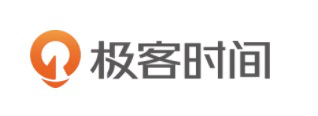

In [1]:
from PIL import Image
from torchvision import transforms


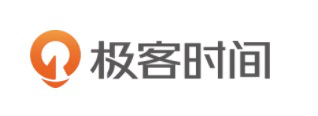

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [3]:
img = Image.open("data/images/jk.jpg")
display(img)
print(type(img))

In [7]:
img1 = transforms.ToTensor()(img)
print(type(img1))

<class 'torch.Tensor'>


In [8]:
img2 = transforms.ToPILImage()(img1)
print(type(img2))

<class 'PIL.Image.Image'>


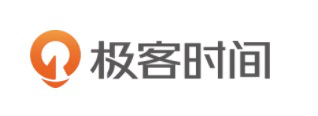

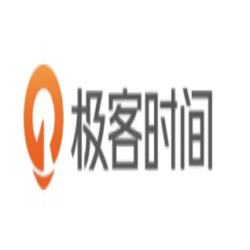

In [9]:
# 定义一个操作
resize_img_operator = transforms.Resize((250, 250), interpolation=2)  # 2:双线性插值

# 原图
display(img)

# resize操作
img3 = resize_img_operator(img)
display(img3)

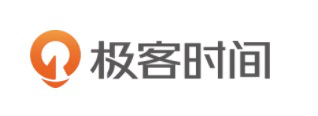

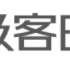

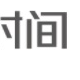

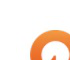

Crop 1 size: (70, 60)


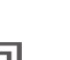

Crop 2 size: (70, 60)


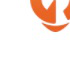

Crop 3 size: (70, 60)


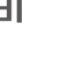

Crop 4 size: (70, 60)


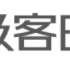

Crop 5 size: (70, 60)


In [10]:
center_crop = transforms.CenterCrop((60, 70))
random_crop = transforms.RandomCrop((80, 80))
five_crop = transforms.FiveCrop((60, 70))

# 原图
orig_img = img.copy()
display(orig_img)

# 中心裁剪
img4 = center_crop(orig_img)
display(img4)

# 随机裁剪
img5 = random_crop(orig_img)
display(img5)

# 五裁剪
img6 = five_crop(orig_img)
for i, img_crop in enumerate(img6):
    display(img_crop)
    print(f"Crop {i + 1} size: {img_crop.size}")

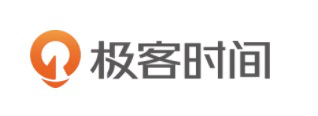

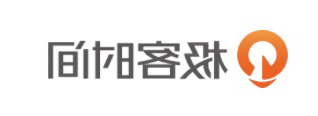

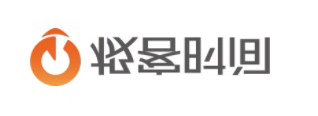

In [11]:
h_flip = transforms.RandomHorizontalFlip(p=1)  # 水平翻转
v_flip = transforms.RandomVerticalFlip(p=1)  # 垂直翻转

# 原图
orig_img = img.copy()
display(orig_img)

# 水平翻转
img7 = h_flip(orig_img)
display(img7)

# 垂直翻转
img8 = v_flip(orig_img)
display(img8)

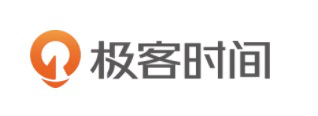

Tensor after normalization: tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])


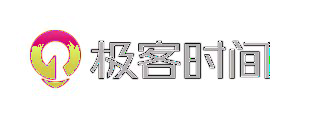

In [20]:
norm_oper = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])

# 原图
orig_img = img.copy()
display(orig_img)

# 将图像转换为Tensor
img_tensor = transforms.ToTensor()(img)

# 标准化
tensor_norm = norm_oper(img_tensor)
print("Tensor after normalization:", tensor_norm)

img_norm = transforms.ToPILImage()(tensor_norm)
display(img_norm)

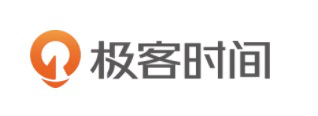

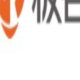

In [23]:
# 原图
orig_img = img.copy()
display(orig_img)

# 定义一系列图像变换操作
composed = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.RandomCrop(80),
])

# 组合操作
img_transformed = composed(orig_img)
display(img_transformed)

In [25]:
from torchvision import transforms
from torchvision import datasets

# 定义图像变换操作
my_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

# 读取数据集，同时做转换
mnist_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=my_transform,target_transform=None)

# 查看数据集
item = mnist_dataset.__getitem__(0)
print("Image shape:", item[0].shape)
print("Image type:", type(item[0]))

Image shape: torch.Size([1, 28, 28])
Image type: <class 'torch.Tensor'>
